In [23]:
import numpy as np
import wavemodule
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy import signal
from waveforms import *

In [95]:
sampling_tate = 4000
fs1 = 200
fs2 = 400
fs3 = 600
t = 2
n = t * sampling_tate

样点数量：8000
样点数量：8000
样点数量：8000


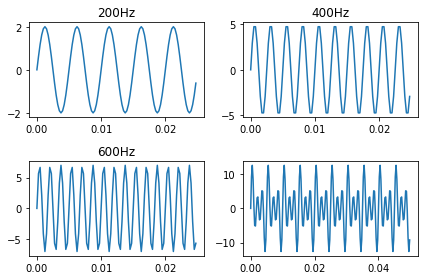

In [96]:
x1, y1 = wavemodule.sin(2, fs1, sampling_tate, 0, t)
x2, y2 = wavemodule.sin(5, fs2, sampling_tate, 0, t)
x3, y3 = wavemodule.sin(7, fs3, sampling_tate, 0, t)
plt.subplot(221)
plt.title("200Hz")
plt.plot(x1[0:100], y1[0:100])

plt.subplot(222)
plt.title("400Hz")
plt.plot(x2[0:100], y2[0:100])

plt.subplot(223)
plt.title("600Hz")
plt.plot(x3[0:100], y3[0:100])

y4 = y1+y2+y3
plt.subplot(224)
plt.plot(x1[0:200], y4[0:200])
plt.tight_layout()

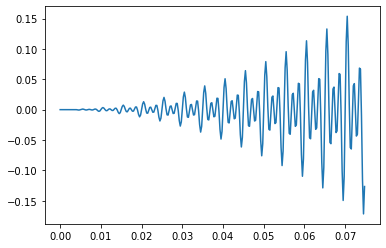

In [97]:
w = signal.windows.hann(n)
y5 = y4 * w
plt.plot(x1[0:300], y5[0:300])

600.0


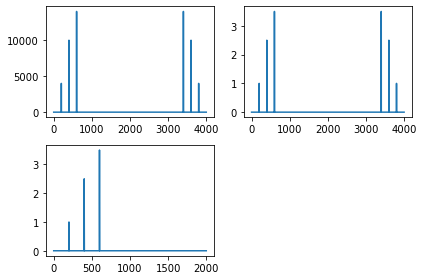

In [100]:
fft_y = fft(y4 * w)
abs_y = abs(fft_y)

x =  np.arange(n) * (sampling_tate / (t*sampling_tate))  # 频率的个数 * (fs/采样点数)  64KHz 16个点采样，一个点就是4KHz
plt.subplot(221)
plt.plot(x, abs_y)  # 双边振幅谱未归一化

normalization_y = abs_y / (n / 2) # 振幅 = 当前值 / (采样点 / 2)
plt.subplot(222)
plt.plot(x, normalization_y) # 双边振幅谱归一化

normalization_harf_y = normalization_y[0:n//2] 
plt.subplot(223)
plt.plot(x[0:n//2], normalization_harf_y) # 单边振幅谱归一化
plt.tight_layout()

max_pos = np.argmax(normalization_harf_y) # 最大幅值所在位置 
fs = x[max_pos] # 最大频率
print(fs)

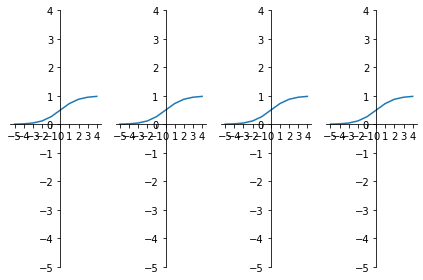

In [102]:
x=np.arange(-5,5,1)
y=1/(1+np.exp(-x)) #生成x,y
fig, ax = plt.subplots(1,4)

for i in range(len(ax)):
    ax[i].plot(x,y)  #plot绘制基本图
    ax[i].spines['right'].set_color('none')
    ax[i].spines['top'].set_color('none')
    ax[i].xaxis.set_ticks_position('bottom')
    ax[i].spines['bottom'].set_position(('data',0))
    ax[i].yaxis.set_ticks_position('left')
    ax[i].spines['left'].set_position(('data',0)) #更改坐标轴为十字坐标轴
    
    ax[i].set_xticks(np.arange(-5, 5, 1).tolist())
    ax[i].set_yticks(np.arange(-5, 5, 1).tolist())  #设置x,y轴刻度
    
fig.tight_layout()
    # plt.grid(linestyle=":")   #为图片添加网格
 
    # plt.annotate("x", (5,0.05), xycoords='data',xytext=(5,0.05),fontsize=15)
    # plt.annotate("y", (0.2,1.0), xycoords='data',xytext=(0.2,1.0),fontsize=15)#以注释的方式添加x,y轴显示


# sin cos

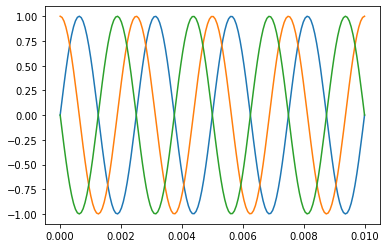

In [103]:
sample_fs = 16000 # 采样频率16MHz
signal_fs = 400   # 信号频率400Hz
t = 4/signal_fs            # 采样时长1s
x = np.linspace(0, t, int(sample_fs * t)) # 时间轴X
w1 = sin(w=2*np.pi * signal_fs, phi=0) # 生成这样一个波， w参数指的是角频率（w）= 2*np.pi/T
w2 = cos(w=2*np.pi * signal_fs, phi=0)
w3 = cos(w=2*np.pi * signal_fs, phi=np.pi/2) # 相位左移90°
plt.plot(x, w1(x)) # 根据时间轴X,取出Y值，调用的是__call__()函数，这么写就是调用它
plt.plot(x, w2(x))
plt.plot(x, w3(x))


# square

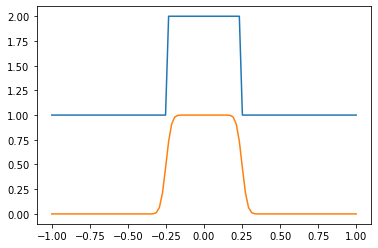

In [104]:
x = np.linspace(-1, 1, 100)
w1 = square(0.5)
w2 = square(0.5, edge=0.2)
plt.plot(x, w1(x) + 1)
plt.plot(x, w2(x))

# pulse

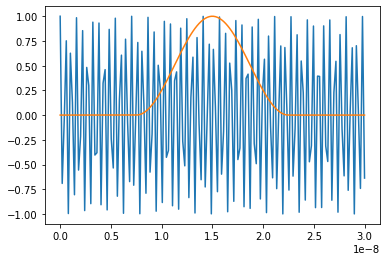

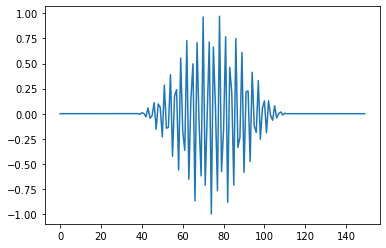

In [26]:
sample_fs = 5e+9
signa_fs = 6.812e+9
time_len = 30e-9
width = 15e-9

x = np.linspace(0, time_len, int(sample_fs * time_len))
w1 = cos(2*np.pi*signa_fs)
plt.plot(x, w1(x))
w2 = cosPulse(width) >> time_len / 2 
plt.plot(x, w2(x))
plt.show()
w3 = w1 * w2
plt.plot(w3(x))

150


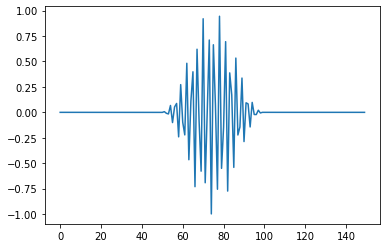

In [126]:
def Pulse_wav(waveform = 'cos',envelope = 'cosPulse',samplerate = 2e9,freq = 201e6,time_len = 30e-9,width = 15e-9,repeat = 1,delay =10e-9):
    
    time = np.linspace(0,time_len,int(time_len*samplerate))
    print(len(time))
    pulse = (eval(f'{waveform}')(2*np.pi*freq))*(eval(f'{envelope}')(width)>>time_len/2)

    wav = zero()
    for i in range(repeat):
        wav += pulse >> (width + delay)*i
    
    return time,wav

time,wav1 = Pulse_wav(samplerate = 5e9,freq = 6.812e9,time_len = 30e-9,width = 10e-9,repeat = 1,delay =10e-9)
plt.plot(wav1(time))

# 画图说明

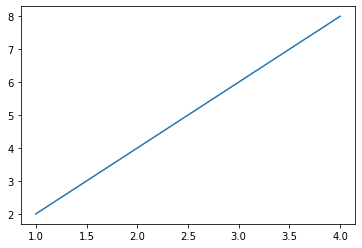

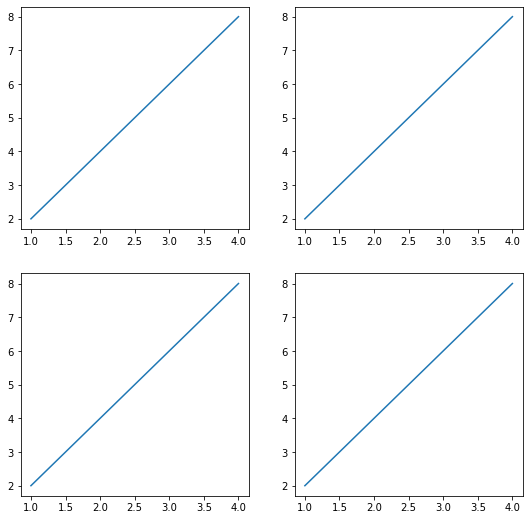

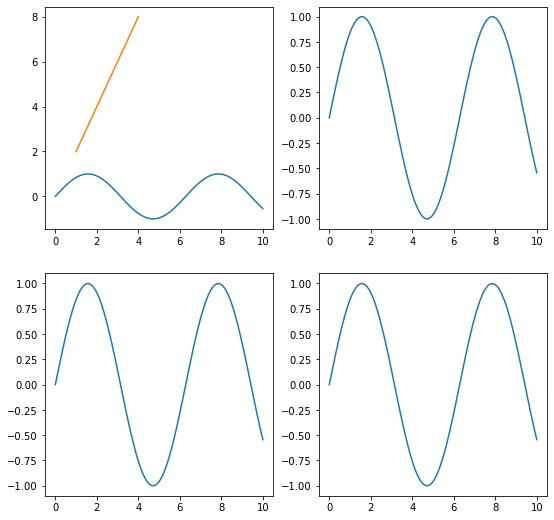

In [1]:
# 画板figure, 画纸subplot, 可多图绘画
# 如果事先不声明画板，默认是创建一个画板一个画纸
import matplotlib.pyplot as plt
import numpy as np

# 默认一个画板一个画纸
x = [1, 2, 3, 4]
y = [2, 4, 6, 8]
plt.plot(x, y)
plt.show()

# 一个画板多个图
fig = plt.figure(1,figsize=(9,9))
plt.subplot(2, 2, 1)
plt.plot(x, y)
plt.subplot(2, 2, 2)
plt.plot(x, y)
plt.subplot(2, 2, 3)
plt.plot(x, y)
plt.subplot(2, 2, 4)
plt.plot(x, y)
plt.show()

# 一个画板多个图，还可以这么写
fig,  axs = plt.subplots(2, 2, figsize = (9, 9)) # 创建一个画板，并分成几份画纸
xx = np.linspace(0, 10, 100)
yy = np.sin(xx)
axs[0, 0].plot(xx, yy, x, y)
axs[0, 1].plot(xx, yy)
axs[1, 0].plot(xx, yy)
axs[1, 1].plot(xx, yy)
plt.show()
